<a href="https://colab.research.google.com/github/Asir-IO/digit-classification/blob/main/lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import layers
from sklearn import preprocessing
import cv2


ModuleNotFoundError: No module named 'tensorflow'

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#load data and split it to train/test
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Target digits to augment (you can add/remove digits here)
target_digits = [0, 3, 4, 5, 9]

# Initialize augmentation generator
augmentor = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)

augmented_images = []
augmented_labels = []

# For each digit, generate ~1000 augmented images
for digit in target_digits:
    # Select samples of this digit
    indices = np.where(y_train == digit)[0]
    samples = x_train[indices][:1000].reshape(-1, 28, 28, 1)  # subset + add channel

# Generate new images
    gen = augmentor.flow(samples, batch_size=32, shuffle=False)
    for _ in range(len(samples) // 32):
        batch = next(gen)
        augmented_images.extend(batch)
        augmented_labels.extend([digit] * len(batch))

# Convert to numpy arrays
augmented_images = np.array(augmented_images).reshape(-1, 28, 28)
augmented_labels = np.array(augmented_labels)

# Combine with original data
x_train = np.concatenate((x_train, augmented_images), axis=0)
y_train = np.concatenate((y_train, augmented_labels), axis=0)

print("Augmentation complete.")
print("x_train:", x_train.shape)
print("y_train:", y_train.shape)
print("x_test:", x_test.shape)
print("y_test:", y_test.shape)


Augmentation complete.
x_train: (64960, 28, 28)
y_train: (64960,)
x_test: (10000, 28, 28)
y_test: (10000,)


In [6]:
#data reshaping and preprocessing
x_train=x_train.reshape(64960,784)
x_test=x_test.reshape(10000,784)

x_train= x_train / 255
x_test= x_test / 255

In [7]:
#Convert class labels into one-hot encoded vectors.
from tensorflow.keras.utils import to_categorical

y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [8]:
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=(784,)),
    layers.Dropout(0.2),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
from tensorflow.keras.callbacks import EarlyStopping

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

model.fit(x_train,y_train, epochs=10, validation_data=(x_test, y_test), callbacks=[early_stopping])


Epoch 1/10
2030/2030 ━━━━━━━━━━━━━━━━━━━━ 25s 11ms/step - accuracy: 0.8481 - loss: 0.4786 - val_accuracy: 0.9655 - val_loss: 0.1101
Epoch 2/10
2030/2030 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9590 - loss: 0.1397 - val_accuracy: 0.9753 - val_loss: 0.0819
Epoch 3/10
2030/2030 ━━━━━━━━━━━━━━━━━━━━ 23s 11ms/step - accuracy: 0.9687 - loss: 0.0997 - val_accuracy: 0.9772 - val_loss: 0.0771
Epoch 4/10
2030/2030 ━━━━━━━━━━━━━━━━━━━━ 40s 10ms/step - accuracy: 0.9742 - loss: 0.0850 - val_accuracy: 0.9792 - val_loss: 0.0674
Epoch 5/10
2030/2030 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9782 - loss: 0.0722 - val_accuracy: 0.9836 - val_loss: 0.0606
Epoch 6/10
2030/2030 ━━━━━━━━━━━━━━━━━━━━ 23s 11ms/step - accuracy: 0.9816 - loss: 0.0603 - val_accuracy: 0.9801 - val_loss: 0.0718
Epoch 7/10
2030/2030 ━━━━━━━━━━━━━━━━━━━━ 38s 10ms/step - accuracy: 0.9833 - loss: 0.0549 - val_accuracy: 0.9814 - val_loss: 0.0673
Epoch 8/10
2030/2030 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.9838 -

In [20]:
#predictions
predicted_classes = np.argmax(model.predict(x_test), axis=1)
true_classes = y_test.argmax(axis=1)
print("Predicted classes:", predicted_classes)
print("True classes:", true_classes)

model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Predicted classes: [7 2 1 ... 4 5 6]
True classes: [7 2 1 ... 4 5 6]
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9807 - loss: 0.0711


[0.060564104467630386, 0.9836000204086304]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
predicted num: 0


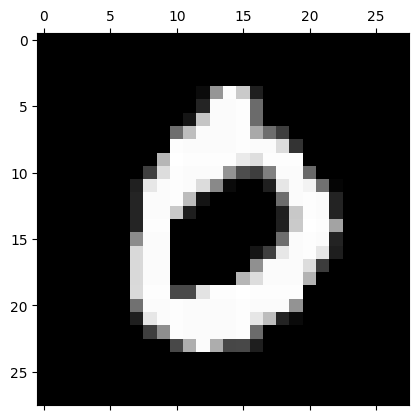

In [12]:
i = 3
plt.matshow(x_test[i].reshape(28, 28), cmap='gray')
y_pred = model.predict(x_test)
print(f"predicted num: {np.argmax(y_pred[i])}")

In [13]:
#accuracy
loss_train, accuracy_train = model.evaluate(x_train, y_train, verbose=0)
loss_test, accuracy_test = model.evaluate(x_test, y_test, verbose=0)

print("Training accuracy:", accuracy_train)
print("Testing accuracy:", accuracy_test)

Training accuracy: 0.9900092482566833
Testing accuracy: 0.9836000204086304


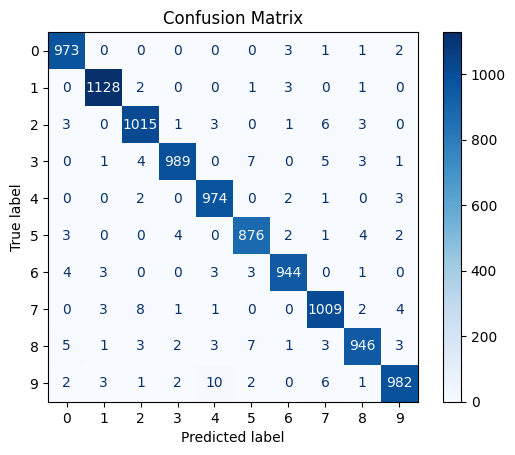

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(true_classes, predicted_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [15]:
from sklearn.metrics import classification_report

y_test_labels = np.argmax(y_test, axis=1)
y_prob = model.predict(x_test)
y_pred = np.argmax(y_prob, axis=1)
print("Classification Report: \n", classification_report(y_test_labels, y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.99      0.98      0.98      1010
           4       0.98      0.99      0.99       982
           5       0.98      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.97      0.98       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [16]:
model.save('model.keras')

In [17]:
from PIL import Image

In [18]:
def predict(sketchpad_input):
  if isinstance(sketchpad_input,dict):
    img=sketchpad_input["composite"]
  else:
    img=sketchpad_input

  if isinstance(img,np.ndarray):
    img=Image.fromarray(img)

  img=img.convert("L")
  img=img.resize((28,28))

  img_array=np.array(img)
  img_array=img_array / 255.0
  img_array=img_array.reshape(1,784)
  img_array = 1.0 - img_array

  probabilities = model.predict(img_array)[0]
  output = ""
  for i, p in enumerate(probabilities):
    output += f"{i}: {p*100:.2f}% \n"
  output += f"\nIt is (most likely): {np.argmax(probabilities)}"
  return output


In [19]:
import gradio as gr
ui=gr.Interface(fn=predict,inputs=gr.Sketchpad(),outputs="text")

ui.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://6906a82b6ec64c3cbd.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
